<a href="https://colab.research.google.com/github/RoAlro/InmersionDeDatos1-ALURA/blob/main/Inmersion_de_datos_Desafio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [273]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
2534,Casa,Casa en venta en Castilla,3,3,94,Castilla,KENNEDY: Castilla + Bavaria,$ 430.000.000
8069,Apartamento,Apartamento en venta en Engativa,3,2,62,Engativa,Engativá,$ 410.000.000
5114,Apartamento,Apartamento en venta en Chapinero Alto,2,2,97,Chapinero Alto,CHAPINERO: Pardo Rubio + Chapinero,$ 570.000.000
8321,Apartamento,Apartamento en venta en Barrios Unidos,3,3,120,Barrios Unidos,Los Andes,$ 640.000.000
674,Apartamento,Apartamento en venta en Zona Noroccidental,1,1,41,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 246.000.000


In [274]:
#Renombrabdo Columnas---
#-------------------------------------------------------
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
284,Apartamento,Apartamento en venta en Santa Fe,3,2,172,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 750.000.000
1333,Apartamento,Apartamento en venta en Usaquén,3,2,92,Usaquén,Usaquén,$ 485.000.000
3041,Apartamento,Apartamento en venta en Los Rosales,3,3,230,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,$ 1.380.000.000
276,Apartamento,Apartamento en venta en Mazuren,3,3,85,Mazuren,El Prado,$ 406.000.000
357,Bodega,Bodega en venta en Puente Aranda,3,2,68,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 164.000.000
779,Apartamento,Apartamento en venta en Usaquén,1,2,54,Usaquén,Usaquén,$ 400.000.000
8821,Apartamento,Apartamento en venta en El Batán,3,2,75,El Batán,La Alhambra,$ 410.000.000
4000,Casa,Casa en venta en Usaquén,3,3,340,Usaquén,Usaquén,$ 2.300.000.000
6719,Casa,Casa en venta en Engativa,10,6,480,Engativa,Engativá,$ 850.000.000
4837,Casa,Casa en venta en Madelena,6,4,306,Madelena,Arborizadora,$ 650.000.000


In [275]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [276]:
inmuebles.Valor[0]+inmuebles.Valor[1]+inmuebles.Valor[:5]

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [277]:
inmuebles.Valor[0].split()

['$', '360.000.000']

In [278]:
### Sin expand=True devuelve un objeto de tipo series
##Con Expand = True permite separar en formato dataframe de 2 columnas
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
4925,Apartamento,Apartamento en venta en Usaquén,2,2,67,Usaquén,Usaquén,$ 320.000.000,$,320.000.000
1977,Apartamento,Apartamento en venta en Usaquén,3,4,159,Usaquén,Usaquén,$ 850.000.000,$,850.000.000
5256,Apartamento,Apartamento en venta en Zona Noroccidental,1,1,57,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 345.000.000,$,345.000.000


In [279]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [280]:
# transformando a valor numérico los valores de precio, reemplazando el punto(.) por un valor vacío
# Sin Embargo esto sigue siendo un tipo de dato object, por tanto se debe convertir a float
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [281]:
# Creando la columna precio millón para visualizar los precios con menos dificultad
#
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [282]:
pd.set_option('display.precision',2)
########## Con esto solamente se muestran 2 decimales para que los datos se visualicen mejor

pd.set_option('display.float_format', lambda x: '%.2f' % x)
####### Para mostrar en formato float
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


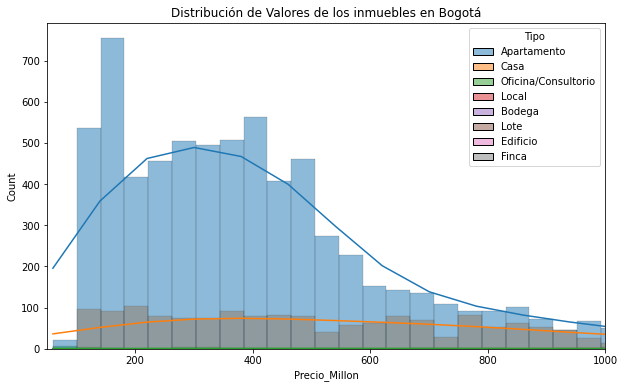

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.savefig('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/valor_inmuebles.png',format='png')
plt.show()

**Desafíos**

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

Analizando los datos de 3 en 3

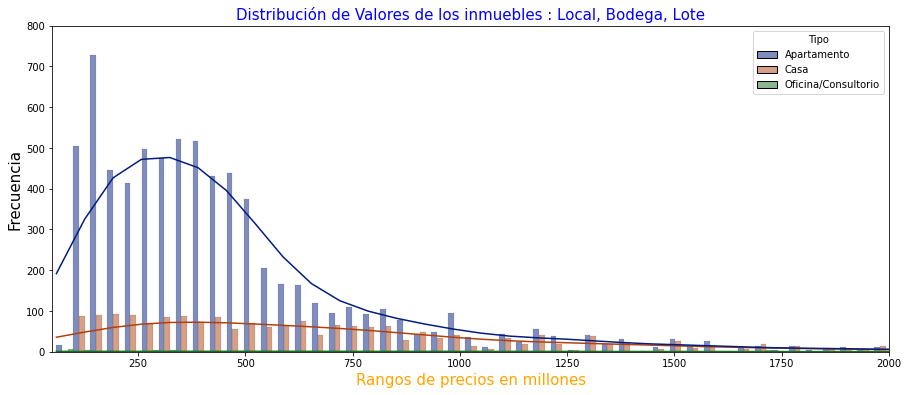

In [284]:
inmuebles_filtr=inmuebles.query("Tipo in ['Apartamento','Casa','Oficina/Consultorio']")
plt.figure(figsize=(15,6))
grafica = sns.histplot(data=inmuebles_filtr, x='Precio_Millon', kde=True, hue='Tipo', palette='dark',multiple='dodge')
grafica.set_title('Distribución de Valores de los inmuebles : Local, Bodega, Lote',fontsize=15,color='blue')
plt.xlim((50,2000))
plt.ylim((0,800))
plt.xlabel('Rangos de precios en millones',fontsize=15,color='orange')
plt.ylabel('Frecuencia',fontsize=15,color='black')
plt.savefig('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/valor_inmuebles1.png',format='png')
plt.show()

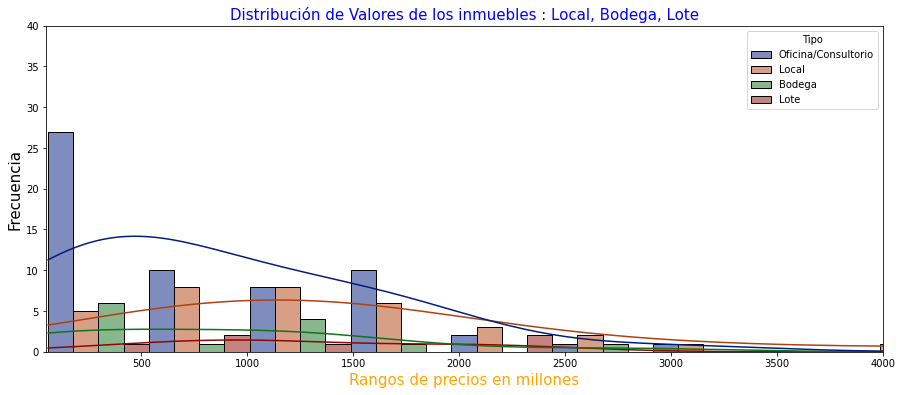

In [285]:
inmuebles_filtr=inmuebles.query("Tipo in ['Lote','Local','Bodega','Oficina/Consultorio']")
plt.figure(figsize=(15,6))
grafica = sns.histplot(data=inmuebles_filtr, x='Precio_Millon', kde=True, hue='Tipo', palette='dark',multiple='dodge')
grafica.set_title('Distribución de Valores de los inmuebles : Local, Bodega, Lote',fontsize=15,color='blue')
plt.xlim((50,4000))
plt.ylim((0,40))
plt.xlabel('Rangos de precios en millones',fontsize=15,color='orange')
plt.ylabel('Frecuencia',fontsize=15,color='black')
plt.savefig('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/valor_inmuebles2.png',format='png')
plt.show()

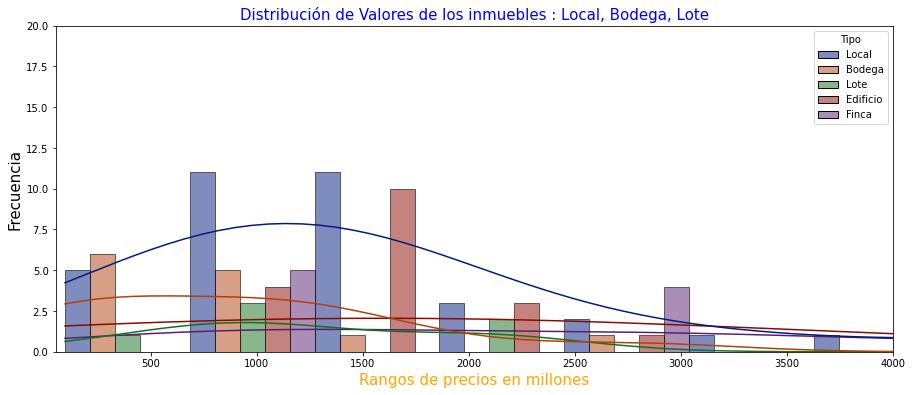

In [286]:
inmuebles_filtr=inmuebles.query("Tipo in ['Local','Bodega','Lote','Edificio','Finca']")
plt.figure(figsize=(15,6))
grafica = sns.histplot(data=inmuebles_filtr, x='Precio_Millon', kde=True, hue='Tipo', palette='dark',multiple='dodge')
grafica.set_title('Distribución de Valores de los inmuebles : Local, Bodega, Lote',fontsize=15,color='blue')
plt.xlim((50,4000))
plt.ylim((0,20))
plt.xlabel('Rangos de precios en millones',fontsize=15,color='orange')
plt.ylabel('Frecuencia',fontsize=15,color='black')
plt.savefig('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/valor_inmuebles3.png',format='png')
plt.show()

De acuerdo con el histograma realizado la oferta de departamentos es muchisimo mayor que cualquier otro tipo de inmueble.

Por otra parte los precios de los Apartamentos que se ofertan con mayor frecuencia suelen estar dentro de los rangos más bajos del dataset.

Además, los Apartamentos y las Casas tienen la mayor cantidad de registros en la ciudad de bogotá; mientras que los otros tipos de inmuebles tienen muy poca frecuencia en todos los rangos de precios.

Sin embargo, conforme los precios de los inmuebles van aumentando, la oferta de departamentos respecto a la oferta de casas se iguala.

In [287]:
inmuebles['precio_por_m2'] = inmuebles.Precio_Millon / inmuebles.Area
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,precio_por_m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58


In [288]:
Prom_precio_m2=inmuebles.groupby(by=["Barrio"]).precio_por_m2.mean()
Prom_precio_m2

Barrio
Alameda              5.98
Alhambra             4.33
Andes Norte          6.05
Antonio Nariño       3.53
Barrancas            4.42
                     ... 
Villa Maria          2.04
Villas De Granada    3.17
Villemar             3.99
Zona Franca          2.96
Zona Noroccidental   4.62
Name: precio_por_m2, Length: 149, dtype: float64

In [289]:
Prom_precio_m2=Prom_precio_m2.sort_values(ascending=False).head(10)
Prom_precio_m2

Barrio
El Virrey         10.20
Santa Ana          9.36
La Merced          8.98
Chico Norte        8.54
Los Rosales        8.17
El Refugio         7.96
Las Nieves         7.89
El Retiro          7.72
Chico Reservado    7.61
Chapinero          7.43
Name: precio_por_m2, dtype: float64

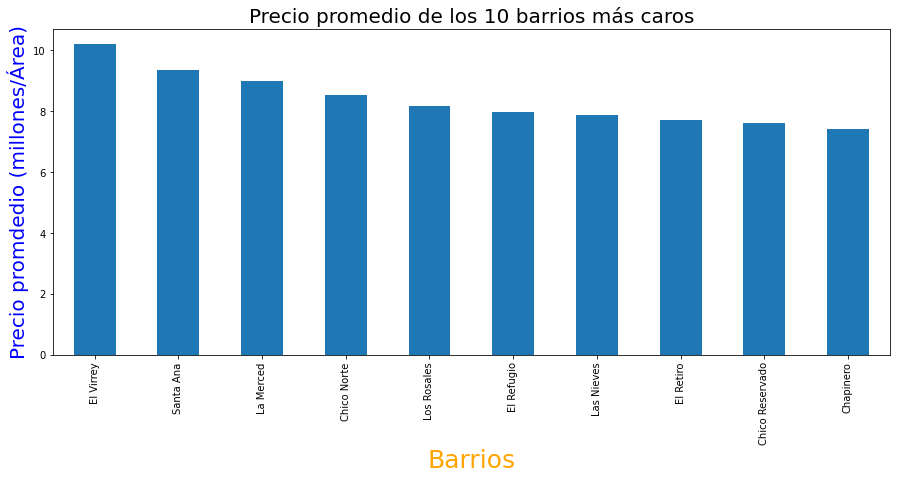

In [290]:
plt.figure(figsize=(15,6))
graf=Prom_precio_m2.plot.bar()

plt.xlabel('Barrios',fontsize=25,color='orange')
plt.ylabel('Precio promdedio (millones/Área)',fontsize=20,color='Blue')
plt.savefig('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/Precio promedio de los 10 barrios mas caros.png',format='png')
graf.set_title('Precio promedio de los 10 barrios más caros',fontsize=20,color='black')
plt.show()